Activation function for a LIFE
==============================

This script investigates the activation function for a longitudinal intrafascicular electrode (LIFE). It is similar to the previous example but include geometrical consideration, and computations are evaluated with the FEM solver in background (transparent for user).

Text(0.5, 1.0, 'Activation function of LIFE for different geometries')

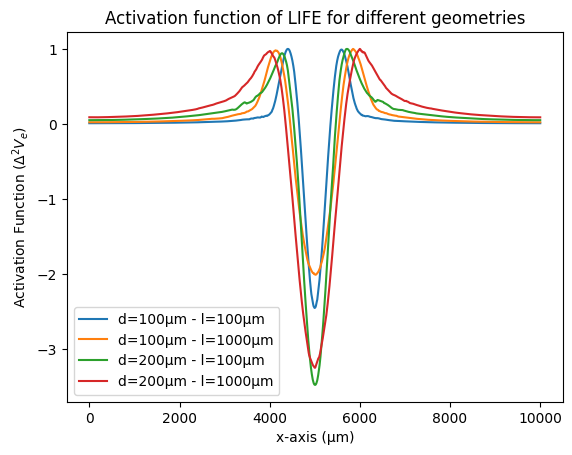

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sys
import nrv

nrv.parameters.set_nrv_verbosity(2)

d_elect_list = [100,200]
LIFE_length_list = [100,1000]

def move_mean(A, N):
    A = signal.savgol_filter(A, N, 3)
    #A = np.convolve(A, np.ones(N)/N, mode='valid')
    return A

def derivate(A, n_order, N=99):
    for _ in range(n_order):
        A = np.diff(A)
        A = move_mean(A, N)
    return A

if __name__ == '__main__':
    #dummy stimulus def
    start = 1
    I_cathod = 500
    I_anod = I_cathod/5
    T_cathod = 60e-3
    T_inter = 40e-3
    stim1 = nrv.stimulus()
    stim1.biphasic_pulse(start, I_cathod, T_cathod, I_anod, T_inter)

    #nerve
    L = 10000
    Nerve_D = 1500
    Fascicle_D = 1000
    Outer_D = 6

    ##### electrodes
    D_1 = 25
    y_c_1 = 0
    z_c_1 = 0

    ##### compute footprints
    x_ftp = np.linspace(0,L,num=1000)

    plt.figure()

    for d_elect in d_elect_list:
        for length_1 in LIFE_length_list:

            ##### extracellular context
            test_stim = nrv.FEM_stimulation()
            test_stim.reshape_outerBox(Outer_D)
            test_stim.reshape_nerve(Nerve_D, L)
            test_stim.reshape_fascicle(Fascicle_D)
            x_1_offset = L/2 - (length_1/2)
            elec_1 = nrv.LIFE_electrode('LIFE', D_1, length_1, x_1_offset, d_elect, z_c_1)
            test_stim.add_electrode(elec_1, stim1)

            test_stim.compute_electrodes_footprints(x_ftp, y=0, z=0, ID=0)
            ftp = elec_1.footprint
            acti_function = derivate(ftp, 2)
            acti_function = acti_function/np.max(acti_function)

            x_plot = np.linspace(0,L, len(acti_function))
            plt.plot(x_plot, acti_function, label=f'd={d_elect}µm - l={length_1}µm')


            del elec_1,test_stim

    plt.ylabel(r'Activation Function ($\Delta^2V_e$)')
    plt.xlabel('x-axis (µm)')
    plt.legend()
    plt.title('Activation function of LIFE for different geometries')
    #plt.show()
